In [47]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import pandas as pd



In [48]:
# Now using the taggle dataset

home_file_path = 'data/all/train.csv'
home_data = pd.read_csv(home_file_path)

features = list(home_data[home_data.applymap(np.isreal)].dropna(axis='columns', how='any').columns[1:-1])

def fitness(features):
    X = home_data[features]
    y = home_data.SalePrice
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=3)
    rf_model = RandomForestRegressor(random_state=0, max_depth=23, n_estimators=21)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae

fitness(features)

17503.43796477495

In [55]:
import operator

X = home_data[features]

pca = PCA().fit(X)
# print "Explained variance by component: %s" % pca.explained_variance_ratio_


variances = {}

for i in range(0, len(features)):
    variances[features[i]] = pca.explained_variance_ratio_[i]
    
variancesSorted = sorted(variances.items(), key = operator.itemgetter(1), reverse=True)
variancesSorted

[('MSSubClass', 0.9851167683613585),
 ('LotArea', 0.004884823269930831),
 ('OverallQual', 0.0033900584026544324),
 ('OverallCond', 0.0027751259204426984),
 ('YearBuilt', 0.002415525429782862),
 ('YearRemodAdd', 0.0004968018561648063),
 ('BsmtFinSF1', 0.0003063270861728277),
 ('BsmtFinSF2', 0.00029546485473374467),
 ('BsmtUnfSF', 0.00013887949250234393),
 ('TotalBsmtSF', 4.11335118320139e-05),
 ('1stFlrSF', 3.4123096905801924e-05),
 ('2ndFlrSF', 3.049548095454302e-05),
 ('LowQualFinSF', 2.8012724680181666e-05),
 ('GrLivArea', 1.5160583191384933e-05),
 ('BsmtFullBath', 1.477829848786846e-05),
 ('BsmtHalfBath', 8.380200053171363e-06),
 ('FullBath', 5.951547953808886e-06),
 ('HalfBath', 2.065925561967123e-06),
 ('BedroomAbvGr', 7.186051485794218e-08),
 ('KitchenAbvGr', 1.667006304684362e-08),
 ('TotRmsAbvGrd', 9.525151228212544e-09),
 ('Fireplaces', 8.642775201812695e-09),
 ('GarageCars', 6.242078596362728e-09),
 ('GarageArea', 2.870861103055484e-09),
 ('WoodDeckSF', 2.404951690709957e-09)

In [50]:
differentFeatureLengths = {}
for i in range(1, 34):
    featuresTop = []   
    featuresBot = []
    for j in range(i):
        featuresTop.append(variancesSorted[j][0])
#         featuresBot.append(variancesSorted[32 -j][0])
    differentFeatureLengths[i] = fitness(featuresTop)
#     print fitness(featuresBot)
#     print



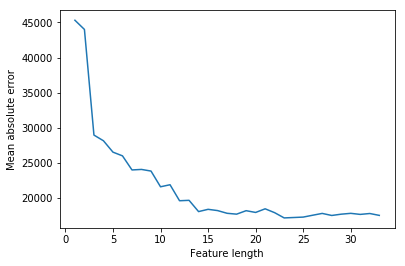

In [51]:
differentFeatureLengths = pd.Series(differentFeatureLengths)

plot = differentFeatureLengths.plot()

plot.set_xlabel("Feature length")
plot.set_ylabel("Mean absolute error")

plot

In [52]:
min = 50000
minIndex = 50
for i in range(0, 33):
    if differentFeatureLengths.iloc[i] < min:
        min = differentFeatureLengths.iloc[i]
        minIndex = i + 1
    
print min
print minIndex

factorFeatures = featuresTop[:minIndex]


17142.7023483366
23


In [54]:
# This is the list of 23 features I got from genetic algorithm, got better results:

geneticFeatures = ['TotRmsAbvGrd', 'Fireplaces','BsmtFinSF1', 'TotalBsmtSF', 'MiscVal', 'LotArea', 'LowQualFinSF', '2ndFlrSF', 
                   'LotArea', 'YrSold', 'KitchenAbvGr', 'YearRemodAdd', '1stFlrSF', 'OverallQual','YearRemodAdd', 'GarageCars', 
                   'BsmtUnfSF', 'TotRmsAbvGrd', 'GrLivArea', 'Fireplaces', 'MSSubClass', 'HalfBath','3SsnPorch']

geneticFeatures = ['LotArea', 'Fireplaces', '1stFlrSF', 'BsmtFullBath', 'OverallCond', 'GrLivArea', 'FullBath', 'YrSold', 'WoodDeckSF', 'GarageCars', 'TotalBsmtSF', 'YearRemodAdd', 'YearBuilt', 'BsmtHalfBath', 'OverallQual', 'HalfBath', 'KitchenAbvGr', 'GarageCars', 'YrSold', 'EnclosedPorch', 'BsmtFinSF1', 'ScreenPorch']

repeatedFeatures = []
notRepeatedGenetic = []

for geneticFeature in geneticFeatures:
    repeated = False
    for factorAnalysisFeature in factorFeatures:
        if geneticFeature == factorAnalysisFeature:
            repeatedFeatures.append(geneticFeature)
            repeated = True
    if not repeated:
        notRepeatedGenetic.append(geneticFeature)

notRepeatedFactor = list(set(factorFeatures) - set(repeatedFeatures))
notRepeatedGenetic2 = list(set(geneticFeatures) - set(repeatedFeatures))

print "There is", len(geneticFeatures), "features in total", "with", len(repeatedFeatures), "in both lists.", '\n'

print "The repeated features are:"
for feature in repeatedFeatures:
    print feature
    
print

print "The features only in genetic features:"
for feature in notRepeatedGenetic:
    print feature
print
# for feature in notRepeatedGenetic2:
#     print feature
# print

print "The features only in factor analysis features:"
for feature in notRepeatedFactor:
    print feature
    
#The genetic features actually have 4 repeats!

There is 22 features in total with 17 in both lists. 

The repeated features are:
LotArea
Fireplaces
1stFlrSF
BsmtFullBath
OverallCond
GrLivArea
FullBath
GarageCars
TotalBsmtSF
YearRemodAdd
YearBuilt
BsmtHalfBath
OverallQual
HalfBath
KitchenAbvGr
GarageCars
BsmtFinSF1

The features only in genetic features:
YrSold
WoodDeckSF
YrSold
EnclosedPorch
ScreenPorch

The features only in factor analysis features:
BsmtUnfSF
BedroomAbvGr
2ndFlrSF
MSSubClass
LowQualFinSF
TotRmsAbvGrd
BsmtFinSF2


In [8]:
repeatedFeatures = list(set(featuresTop[:23]).intersection(set(geneticFeature)))
len(set(featuresTop[:23]))



23

In [9]:
# Find the best minDepth

X = home_data[geneticFeatures]
# X = home_data[test_features]
y = home_data.SalePrice
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=3)

def test_depth(maxDepth=23):
    rf_model = RandomForestRegressor(random_state=3, max_depth=maxDepth)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae

def run_depth_tests(num):
    min = 50000
    minDepth = None
    for i in range(1,num):
        mae = test_depth(i)
        print mae, i, min
        if mae < min:
            min = mae
            minDepth = i
    print '\n', min
    print minDepth

run_depth_tests(30)

     

38023.55166039991 1 50000
28559.977092815217 2 38023.55166039991


/usr/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


24963.077795143807 3 28559.977092815217
21806.49734838426 4 24963.077795143807
20210.440515465238 5 21806.49734838426
18843.14195968229 6 20210.440515465238
18283.379932935095 7 18843.14195968229
18306.443647825028 8 18283.379932935095
18308.184179775642 9 18283.379932935095
17784.319287212442 10 18283.379932935095
18145.504253774237 11 17784.319287212442
17549.8484709761 12 17784.319287212442
17521.544780559758 13 17549.8484709761
17997.217101830603 14 17521.544780559758
18000.47575446109 15 17521.544780559758
18023.613672556017 16 17521.544780559758
17479.06802122535 17 17521.544780559758
18079.339544752293 18 17479.06802122535
17384.828531286068 19 17479.06802122535
17435.771369863014 20 17384.828531286068
17311.117260273975 21 17384.828531286068
17173.32575342466 22 17311.117260273975
17176.653424657536 23 17173.32575342466
17176.653424657536 24 17173.32575342466
17176.653424657536 25 17173.32575342466
17176.653424657536 26 17173.32575342466
17176.653424657536 27 17173.32575342466


In [30]:
def test_n_estimators(nEstimators=10):
    rf_model = RandomForestRegressor(random_state=3, n_estimators=nEstimators)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae


def run_estimators_tests(num):
    min = 50000
    minDepth = None
    for i in range(1,num):
        mae = test_n_estimators(i)
        print mae, i, min
        if mae < min:
            min = mae
            minDepth = i
    print '\n', min
    print minDepth
        
run_estimators_tests(30)


27816.25205479452 1 50000
22808.087671232875 2 27816.25205479452
20118.531506849315 3 22808.087671232875
19403.281506849315 4 20118.531506849315
18528.803835616436 5 19403.281506849315
17775.372602739724 6 18528.803835616436
17761.449315068494 7 17775.372602739724
17530.295547945207 8 17761.449315068494
17277.099847792997 9 17530.295547945207
17176.653424657536 10 17277.099847792997
17043.933250311333 11 17176.653424657536
16901.610502283107 12 17043.933250311333
16823.208640674395 13 16901.610502283107
16791.06614481409 14 16823.208640674395
16859.233059360733 15 16791.06614481409
16663.630993150684 16 16791.06614481409
16688.911522965347 17 16663.630993150684
16585.320091324196 18 16663.630993150684
16521.36712328767 19 16585.320091324196
16494.02191780822 20 16521.36712328767
16469.750554468366 21 16494.02191780822
16589.577085927773 22 16469.750554468366
16732.036807623586 23 16469.750554468366
16689.41187214612 24 16469.750554468366
16791.703780821917 25 16469.750554468366
16796.6

In [34]:
def test_min_split(min_split_number=2):
    rf_model = RandomForestRegressor(random_state=3, min_samples_split=min_split_number)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae


def run_min_split_tests(num):
    min = 50000
    minDepth = None
    for i in range(2,num):
        mae = test_min_split(i)
        if mae < min:
            min = mae
            minDepth = i
        print mae, i, min
    print '\n', min
    print minDepth
        
run_min_split_tests(11)

17176.653424657536 2 17176.653424657536
18033.67342400522 3 17176.653424657536
17849.840127419004 4 17176.653424657536
17851.287922049793 5 17176.653424657536
17724.105720960928 6 17176.653424657536
18047.81663272572 7 17176.653424657536
17987.116251794898 8 17176.653424657536
18077.456484921404 9 17176.653424657536
18312.136417001708 10 17176.653424657536

17176.653424657536
2


In [33]:
def test_min_split(min_split_number=2):
    rf_model = RandomForestRegressor(random_state=3, min_samples_split=min_split_number)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae


def run_min_split_tests(num):
    min = 50000
    minDepth = None
    for i in range(2,num):
        mae = test_min_split(i)
        if mae < min:
            min = mae
            minDepth = i
        print mae, i, min
    print '\n', min
    print minDepth
        
run_min_split_tests(11)

17176.653424657536 2 17176.653424657536
18033.67342400522 3 17176.653424657536
17849.840127419004 4 17176.653424657536
17851.287922049793 5 17176.653424657536
17724.105720960928 6 17176.653424657536
18047.81663272572 7 17176.653424657536
17987.116251794898 8 17176.653424657536
18077.456484921404 9 17176.653424657536
18312.136417001708 10 17176.653424657536

17176.653424657536
2


In [41]:
def test_weight(value=0):
    rf_model = RandomForestRegressor(random_state=3, min_weight_fraction_leaf=value)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae


def run_weight_tests(num):
    min = 50000
    minDepth = None
    for i in range(0,num):
        mae = test_weight(i*0.1)
        if mae < min:
            min = mae
            minDepth = i
        print mae, i*0.1, min
    print '\n', min
    print minDepth
        
run_weight_tests(6)

17176.653424657536 0.0 17176.653424657536
25442.825514138716 0.1 17176.653424657536
35484.15546429057 0.2 17176.653424657536
36428.926930994065 0.3 17176.653424657536
38583.82836702419 0.4 17176.653424657536
54682.14649853006 0.5 17176.653424657536

17176.653424657536
0


In [45]:
def test_max_features(value='auto'):
    rf_model = RandomForestRegressor(random_state=3, max_features=value)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae


def run_max_features_tests():
    min = 50000
    minDepth = None
    for i in ['auto', 'sqrt', 'log2', None]:
        mae = test_max_features(i)
        if mae < min:
            min = mae
            minDepth = i
        print mae, i, min
    print '\n', min
    print minDepth
        
run_max_features_tests()

17176.653424657536 auto 17176.653424657536
18760.373972602738 sqrt 17176.653424657536
18760.373972602738 log2 17176.653424657536
17176.653424657536 None 17176.653424657536

17176.653424657536
auto


In [ ]:
def test_parameter(parameter, value):
    rf_model = RandomForestRegressor(random_state=3, parameter = value)
    rf_model.fit(train_X, train_y)
    val_predictions = rf_model.predict(val_X)
    rf_val_mae = mean_absolute_error(val_predictions, val_y)
    return rf_val_mae

test_parameter('n_estimators', 10)

In [56]:
home_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa